In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.pandas.read_csv('tv_shows.csv',index_col=[0])

In [3]:
data.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [4]:
data.dtypes

ID                  int64
Title              object
Year                int64
Age                object
IMDb               object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object

In [5]:
data.shape

(5368, 11)

In [6]:
data.describe()

,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type
count,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.0
mean,2814.945790,2012.628726,0.367176,0.301975,0.341095,0.065387,1.0
std,1672.385727,10.142813,0.482080,0.459157,0.474122,0.247231,0.0
min,1.000000,1904.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1345.750000,2011.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2788.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,4308.250000,2018.000000,1.000000,1.000000,1.000000,0.000000,1.0
max,5717.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [7]:
#describing specific column
data.IMDb.describe()

count       4406
unique        78
top       7.4/10
freq         208
Name: IMDb, dtype: object

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5363,False,False,False,True,True,False,False,False,False,False,False
5364,False,False,False,True,True,False,False,False,False,False,False
5365,False,False,False,True,True,False,False,False,False,False,False
5366,False,False,False,True,True,False,False,False,False,False,False


In [10]:
data.dropna(axis=0,how='any').shape

(3207, 11)

In [11]:
data_new=data.dropna(axis=0,how='any')

In [12]:
data_new.shape

(3207, 11)

In [13]:
data.shape

(5368, 11)

In [14]:
data_new.dtypes

ID                  int64
Title              object
Year                int64
Age                object
IMDb               object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object

### What are top 10 movies according to rotten tomatoes

In [15]:
data_new.rename(columns={'Rotten Tomatoes':'RottenTomatoes'},inplace=True)

c:\users\91932\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [16]:
data_new.head()

,ID,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [17]:
data_new['RottenTomatoes']=data_new.RottenTomatoes.apply(lambda x: x.replace('/100',' ')).astype("int64")

C:\Users\91932\AppData\Local\Temp/ipykernel_3988/4282898454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['RottenTomatoes']=data_new.RottenTomatoes.apply(lambda x: x.replace('/100',' ')).astype("int64")


In [18]:
data_new.head()

,ID,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8/10,94,1,0,0,0,1
4,5,Dark,2017,16+,8.8/10,93,1,0,0,0,1


In [19]:
data_new.dtypes

ID                 int64
Title             object
Year               int64
Age               object
IMDb              object
RottenTomatoes     int64
Netflix            int64
Hulu               int64
Prime Video        int64
Disney+            int64
Type               int64
dtype: object

In [20]:
data_new.sort_values(by="RottenTomatoes",ascending=False)

,ID,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100,1,0,0,0,1
1950,1960,Rick and Morty,2013,18+,9.2/10,100,0,1,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95,1,1,0,0,1
5057,5376,Loki,2021,16+,8.5/10,95,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4468,4770,Talking Tom and Friends Minis,2016,all,7.6/10,26,0,0,1,0,1
3275,3407,She's Living for This,2012,18+,5.5/10,26,0,1,0,0,1
4478,4780,Paranormal Egypt,2007,all,3.8/10,25,0,0,1,0,1
3279,3412,AwesomenessTV,2013,7+,2.4/10,25,0,1,0,0,1


In [21]:
data_new[data_new.RottenTomatoes==100].count()

ID                2
Title             2
Year              2
Age               2
IMDb              2
RottenTomatoes    2
Netflix           2
Hulu              2
Prime Video       2
Disney+           2
Type              2
dtype: int64

In [22]:
data_new.sort_values(by="RottenTomatoes",ascending=False).head(10)

,ID,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4/10,100,1,0,0,0,1
1950,1960,Rick and Morty,2013,18+,9.2/10,100,0,1,0,0,1
1,2,Stranger Things,2016,16+,8.7/10,96,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0/10,95,1,1,0,0,1
5057,5376,Loki,2021,16+,8.5/10,95,0,0,0,1,1
5058,5377,The Mandalorian,2019,16+,8.8/10,94,0,0,0,1,1
3,4,Better Call Saul,2015,18+,8.8/10,94,1,0,0,0,1
3446,3581,The Boys,2019,18+,8.7/10,93,0,0,1,0,1
1951,1962,Seinfeld,1989,16+,8.8/10,93,0,1,0,0,1
6,7,Peaky Blinders,2013,18+,8.8/10,93,1,0,0,0,1


### Top 10 movies according to IMDb

In [23]:
data_new['IMDb']=data_new.IMDb.apply(lambda x: x.replace('/10','')).astype("float64")

C:\Users\91932\AppData\Local\Temp/ipykernel_3988/1906639989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['IMDb']=data_new.IMDb.apply(lambda x: x.replace('/10','')).astype("float64")


In [24]:
data_new.head()

,ID,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4,100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7,96,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0,95,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8,94,1,0,0,0,1
4,5,Dark,2017,16+,8.8,93,1,0,0,0,1


In [25]:
data_new.IMDb.dtypes

dtype('float64')

In [26]:
data_new.sort_values(by="IMDb",ascending=False).head(10)

,ID,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type
5077,5401,Bluey,2018,all,9.6,71,0,0,0,1,1
3802,4054,The Secret World of Nature: Spain,2020,7+,9.6,51,0,0,1,0,1
3611,3818,Malgudi Days,1987,all,9.5,62,0,0,1,0,1
0,1,Breaking Bad,2008,18+,9.4,100,1,0,0,0,1
2009,2034,Cosmos,2014,all,9.3,82,0,1,1,1,1
80,81,Our Planet,2019,all,9.3,82,1,0,0,0,1
5,6,Avatar: The Last Airbender,2005,7+,9.3,93,1,0,1,0,1
3503,3668,Clarkson's Farm,2021,7+,9.2,76,0,0,1,0,1
1950,1960,Rick and Morty,2013,18+,9.2,100,0,1,0,0,1
5106,5435,Cosmos: Possible Worlds,2020,7+,9.2,62,0,0,0,1,1


### Movies having 18+ restrictions

In [27]:
data_new[data_new['Age']=='18+'].count()

ID                852
Title             852
Year              852
Age               852
IMDb              852
RottenTomatoes    852
Netflix           852
Hulu              852
Prime Video       852
Disney+           852
Type              852
dtype: int64

### Movies that were made in 2010 and IMDb rating >=5

In [28]:
data_new[(data_new['IMDb']>=5)&(data_new['Year']==2010)].count()

ID                98
Title             98
Year              98
Age               98
IMDb              98
RottenTomatoes    98
Netflix           98
Hulu              98
Prime Video       98
Disney+           98
Type              98
dtype: int64

### How many different age categories there

In [29]:
agegroups=data_new.Age.unique()

In [30]:
agegroups

array(['18+', '16+', '7+', 'all', '13+'], dtype=object)

In [31]:
agetitle=data_new.groupby('Age').Title.count()

In [32]:
agetitle

Age
13+      9
16+    987
18+    852
7+     824
all    535
Name: Title, dtype: int64

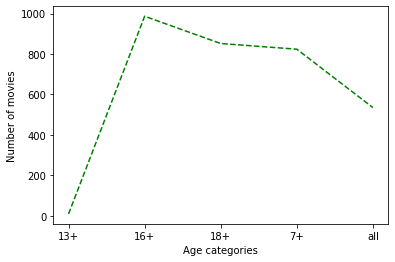

In [33]:
plt.plot(agetitle,'g--')
plt.xlabel("Age categories")
plt.ylabel('Number of movies')
plt.show()

### Number of movies categorized by age before and after 2000 using graph

In [34]:
yeargroups=data_new.Year.unique()

In [35]:
yeargroups

array([2008, 2016, 2013, 2015, 2017, 2005, 2010, 2011, 2020, 2009, 2019,
       2018, 2014, 2003, 2021, 1987, 2006, 1999, 2012, 2000, 1966, 1995,
       2002, 1969, 1993, 1997, 2004, 2007, 2001, 1996, 1998, 1986, 1994,
       1984, 1983, 1981, 1989, 1992, 1990, 1959, 1982, 1991, 1972, 1975,
       1985, 1988, 1951, 1978, 1955, 1977, 1964, 1970, 1961, 1934, 1963,
       1971, 1973, 1967, 1960, 1962, 1976, 1980, 1974, 1952, 1968, 1965,
       1954, 1979, 1957, 1958], dtype=int64)

In [36]:
yeargroups.min()

1934

In [37]:
yeargroups.max()

2021

In [38]:
before2000=data_new[(data_new['Year']<=2000)]

In [39]:
before2000

,ID,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type
40,41,Star Trek: The Next Generation,1987,7+,8.6,86,1,1,1,0,1
54,55,One Piece,1999,7+,8.8,85,1,1,0,0,1
67,68,Gilmore Girls,2000,16+,8.1,84,1,0,0,0,1
84,85,Star Trek,1966,7+,8.3,82,1,1,1,0,1
91,92,Neon Genesis Evangelion,1995,16+,8.5,82,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5226,5568,Bonkers,1993,all,6.8,47,0,0,0,1,1
5242,5586,Adventures in Wonderland,1992,7+,8.0,46,0,0,0,1,1
5253,5597,The Avengers: United They Stand,1999,7+,5.5,45,0,0,0,1,1
5261,5606,Spider-Woman,1979,all,5.8,44,0,0,0,1,1


In [40]:
after2000=data_new[(data_new['Year']>2000)]

In [41]:
after2000

,ID,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Breaking Bad,2008,18+,9.4,100,1,0,0,0,1
1,2,Stranger Things,2016,16+,8.7,96,1,0,0,0,1
2,3,Attack on Titan,2013,18+,9.0,95,1,1,0,0,1
3,4,Better Call Saul,2015,18+,8.8,94,1,0,0,0,1
4,5,Dark,2017,16+,8.8,93,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5336,5684,Disney Family Sundays,2019,all,5.6,31,0,0,0,1,1
5339,5687,Wild Chile,2018,7+,7.5,30,0,0,0,1,1
5340,5688,Howie Mandel's Animals Doing Things,2018,all,3.2,30,0,0,0,1,1
5341,5690,The Big Fib,2020,all,5.4,29,0,0,0,1,1


In [42]:
moviebefore2000=before2000.groupby('Age').Title.count()

In [43]:
moviebefore2000

Age
13+      2
16+     64
18+     21
7+     139
all    108
Name: Title, dtype: int64

In [44]:
movieafter2000=after2000.groupby('Age').Title.count()

In [45]:
movieafter2000

Age
13+      7
16+    923
18+    831
7+     685
all    427
Name: Title, dtype: int64

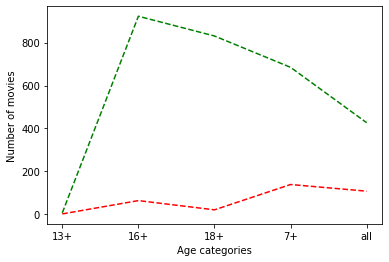

In [46]:
plt.plot(moviebefore2000,'r--')
plt.plot(movieafter2000,'g--')
plt.xlabel('Age categories')
plt.ylabel('Number of movies')
plt.show()

### Ploting the same graph but using the percentage

In [47]:
percentagebefore2000=moviebefore2000/sum(moviebefore2000)

In [48]:
percentagebefore2000

Age
13+    0.005988
16+    0.191617
18+    0.062874
7+     0.416168
all    0.323353
Name: Title, dtype: float64

In [49]:
percentageafter2000=movieafter2000/sum(movieafter2000)

In [50]:
percentageafter2000

Age
13+    0.002436
16+    0.321267
18+    0.289245
7+     0.238427
all    0.148625
Name: Title, dtype: float64

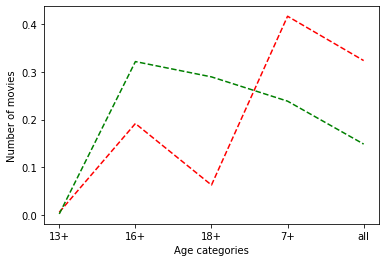

In [51]:
plt.plot(percentagebefore2000,'r--')
plt.plot(percentageafter2000,'g--')
plt.xlabel('Age categories')
plt.ylabel('Number of movies')
plt.show()